In [1]:
import time 
from bs4 import BeautifulSoup
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service as ChromeService 
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager 
import numpy as np

driver=webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
url='https://www.melon.com/chart/index.htm'
# 채널 페이지로 이동 

driver.get(url)
x=[]
p_elements = driver.find_elements(By.CSS_SELECTOR, "span.rank")[1:11] # 0부터 시작하면 "순위"라는 문자열이 포함됨.
for p_element in p_elements:
    x.append(p_element.text)

y=[]    
c_elements = driver.find_elements(By.CSS_SELECTOR, "#lst50 > td:nth-child(8) > div > button > span.cnt")[0:10]
for c_element in c_elements:
    y.append(c_element.text.split(',')[0])

In [2]:
x=list(map(int,x))
y=list(map(int,y))

In [3]:
print(x)
print('\n')
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


[94, 33, 89, 46, 186, 43, 28, 106, 62, 150]


In [4]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from sklearn.linear_model import LinearRegression
x=np.array(x).reshape(-1,1)
y=np.array(y)

In [6]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [7]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


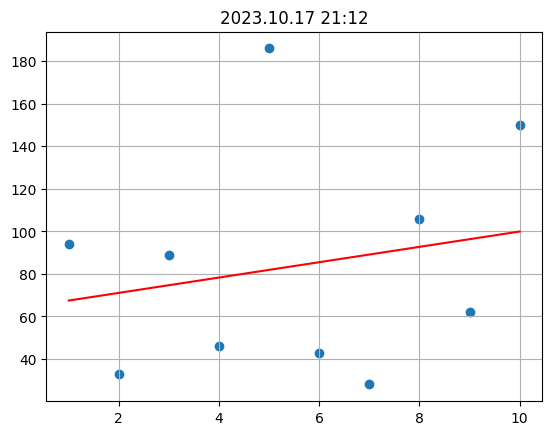

In [9]:
from matplotlib import pyplot 

pyplot.title('2023.10.17 21:12')
pyplot.grid()
pyplot.scatter(x,y)
pyplot.plot(x,model.predict(x),color='r')